In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data
import numpy as np

In [4]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = load_data()

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#### [2] 이미지 분류 모델 구현
##### [2-1]모델 설계 => 층설정
- 입력층 => 입력 28*28   출력    활성화함수 Relu
- 은닉층 => 입력    출력    활성화함수 Relu
- 출력층 => 입력    출력 10  활성화함수(이진분류는 시그모이드 다중 분류시 softmax, 회귀시 X)
- 활성화함수 
- optimizer Adam사용

In [7]:
mnistModel = Sequential()
mnistModel.add(Dense(32, activation='relu',input_shape = (784,)))
mnistModel.add(Dense(128, activation='relu'))
mnistModel.add(Dense(10, activation='softmax'))


In [30]:
mnistModel.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['acc'])

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam

In [10]:
adam_op = Adam(learning_rate=0.1)
acc_ = Accuracy(dtype=tf.int32)
loss_ = SparseCategoricalCrossentropy(from_logits=True)


In [11]:
mnistModel.compile(optimizer = adam_op,
                   loss = loss_,
                   metrics = [acc_])

TypeError: Value passed to parameter 'x' has DataType int32 not in list of allowed values: float16, float32, float64, complex64, complex128

### [3] 학습
- 입력층 => input_shape = (피쳐 수) 또는 input_shape  = [피쳐 수]
#### [3-1] 데이터의 형(shape) 체크 ==> rank-1


In [23]:
X_train = X_train.reshape(60000,-1)

In [24]:
X_train.shape

(60000, 784)

In [31]:
Epoch, VAL_SPLIT = 10,0.2
mnistModel.fit(X_train, y_train, epochs=Epoch, validation_split=VAL_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 40us/sample - loss: 1.2506 - acc: 0.7677 - val_loss: 0.4820 - val_acc: 0.8754
Epoch 2/10
48000/48000 [==============================] - 1s 30us/sample - loss: 0.4923 - acc: 0.8798 - val_loss: 0.4637 - val_acc: 0.8878
Epoch 3/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.4612 - acc: 0.8913 - val_loss: 0.3820 - val_acc: 0.9082
Epoch 4/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.3982 - acc: 0.9043 - val_loss: 0.3854 - val_acc: 0.9128
Epoch 5/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.3754 - acc: 0.9117 - val_loss: 0.3870 - val_acc: 0.9129
Epoch 6/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3365 - acc: 0.9186 - val_loss: 0.3421 - val_acc: 0.9153
Epoch 7/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3036 - acc: 0.9240 - val_loss: 0.

In [26]:
mnistModel.fit(X_train, y_train, epochs = Epoch, validation_split = VAL_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
   32/48000 [..............................] - ETA: 6s

TypeError: 'NoneType' object is not callable

### [4] 평가
- 테스트 데이터 사용 -> 입력 데이터의 형(shape) 설정

In [16]:
X_test = X_test.reshape(10000,-1)
X_test.shape

(10000, 784)

In [62]:
mnistModel.evaluate(X_test,y_test)


10000/10000 [==============================] - 0s 28us/sample - loss: 0.3800 - acc: 0.9399


[0.37998905231677926, 0.9399]

In [63]:

test_data = np.reshape(X_test[0],(28,28))

In [64]:
np.set_printoptions(suppress = True, floatmode= 'fixed')
#자연상수 표현X

array([[0.00000000, 0.00000093, 0.00000032, 0.00000001, 0.00000000,
        0.00000000, 0.00000000, 0.99999344, 0.00000000, 0.00000524]],
      dtype=float32)

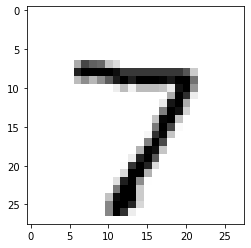

In [65]:
import matplotlib.pyplot as plt
plt.imshow(test_data,cmap= 'gray_r')
y_pred = mnistModel.predict(test_data.reshape(1,-1))
y_pred

In [66]:
np.argmax(y_pred)

7

In [57]:
class DNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.fc_layer1 = Sequential([
        layers.Dense(256),
        layers.dropout(0.2),
        layers.Relu()
        ])
        
        self.fc_layer2 = Sequential([
        layers.Dense(1024),
        layers.dropout(0.2),
        layers.Relu()
        ])
        
        self.fc_layer3 = Sequential([
        layers.Dense(10),
        layers.Softmax()
        ])
    def call(self, x):
        x = self.fc_layer1(x)
        x = self.fc_layer2(x)
        x = self.fc_layer3(x)
        return x    
        